# CS 4304 - Assignment 2
## Dylan Ellsworth 201329133
## Sept 29, 2021


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Question 1

We create the dataframe, get some info and then group by Field of Study to get the max values and sort them in descending order

In [4]:
df = pd.read_csv('students1.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6221 entries, 0 to 6220
Data columns (total 9 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   REF_DATE                                                    6221 non-null   object
 1   GEO                                                         6221 non-null   object
 2   Institution type                                            6221 non-null   object
 3   Registration status                                         6221 non-null   object
 4   International Standard Classification of Education (ISCED)  6221 non-null   object
 5   Field of study                                              6221 non-null   object
 6   Gender                                                      6221 non-null   object
 7   Status of student in Canada                                 6221 non-null   object
 8   VALUE    

In [6]:
df[['Field of study','GEO','VALUE']].groupby('Field of study').max().sort_values(by='VALUE', ascending=False)

,GEO,VALUE
Field of study,,
Social and behavioural sciences and law [4],Territories,49371
Humanities [3],Territories,30864
Physical and life sciences and technologies [6],Territories,29625
Health and related fields [10],Territories,28299
"Architecture, engineering and related technologies [8]",Territories,27963
"Business, management and public administration [5]",Territories,26796
Unclassified,Territories,15525
"Mathematics, computer and information sciences [7]",Saskatchewan,12438
Education [1],Territories,10509


### Question 2

We created a new dataframe to filter full time students and then grouped by the Geo location, and summed up the values.

In [7]:
df2 = df[df['Registration status'] == 'Full-time student']

In [10]:
df3 = df2[['GEO', 'VALUE']].groupby('GEO').sum().reset_index()
df3

,GEO,VALUE
0,Alberta,170856
1,British Columbia,172719
2,Manitoba,48735
3,New Brunswick,22986
4,Newfoundland and Labrador,19620
5,Nova Scotia,44601
6,Ontario,722586
7,Prince Edward Island,6474
8,Quebec,404391
9,Saskatchewan,40806


Text(0.5, 1.0, 'Full time Canadian Students 2018')

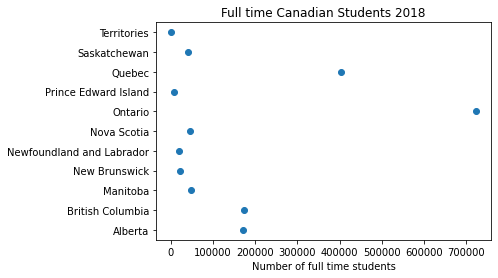

In [11]:
plt.scatter(df3['VALUE'], df3['GEO'])
plt.xlabel('Number of full time students')
plt.title('Full time Canadian Students 2018')

### Question 3

We created three dataframes, one for each species of flower so we could plot on the graph three times, one color for each flower.

In [12]:
iris = pd.read_csv('iris.csv')
setosa = iris[iris['species'] == 'setosa']
versicolor = iris[iris['species'] == 'versicolor']
virginica = iris[iris['species'] == 'virginica']

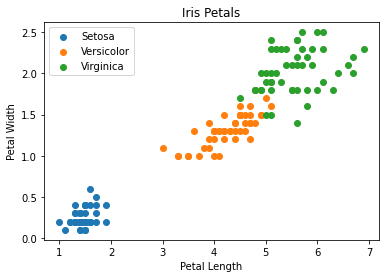

In [13]:
plt.scatter(setosa['petal_length'], setosa['petal_width'], label="Setosa")
plt.scatter(versicolor['petal_length'], versicolor['petal_width'], label="Versicolor")
plt.scatter(virginica['petal_length'], virginica['petal_width'],label="Virginica")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Petals')
plt.legend()

### Question 4

We created a new column for petal area which multiplies the length by the width. We then grouped by species and got the mean area of each species of flower.

In [14]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
iris['petal_area'] = iris['petal_length'] * iris['petal_width']

In [26]:
petal = iris[['species','petal_area']].groupby('species').mean().sort_values(by='petal_area', ascending = False).reset_index()
petal

,species,petal_area
0,virginica,11.2962
1,versicolor,5.7204
2,setosa,0.3656


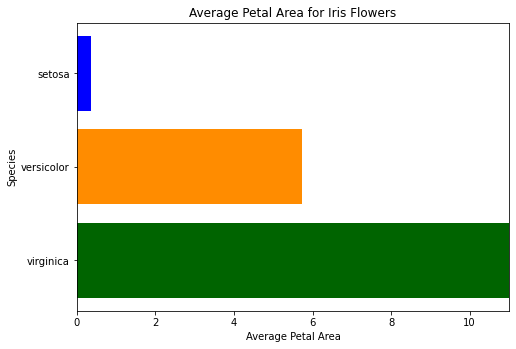

In [37]:
fig = plt.Figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.barh(petal['species'], petal['petal_area'], color = ['darkgreen', 'darkorange','blue'])

ax.set_xlim((0,11))
ax.set_xlabel('Average Petal Area')
ax.set_ylabel('Species')
ax.set_title('Average Petal Area for Iris Flowers')

fig